In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [11]:
#Data read from given set
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#To Check if there are any null value in Dataset
df.isnull == True

False

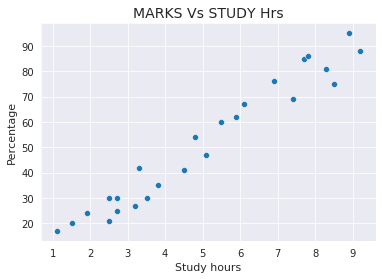

In [13]:
#No null value hence we visualise the data
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('MARKS Vs STUDY Hrs',size=14)
plt.ylabel('Percentage', size=11)
plt.xlabel('Study hours', size=11)
plt.show()


In [10]:
#The above scatter plot denotes correlation between the 'Percentage' and 'Study hours', Now we plot  regression line to confirm this correlation.

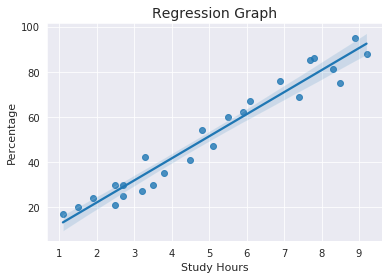

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [14]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Graph',size=14)
plt.ylabel('Percentage', size=11)
plt.xlabel('Study Hours', size=11)
plt.show()
print(data.corr())

In [ ]:
#Thus confirmed that these variables are positively correlated.

In [25]:
# Define x and y from the Data given
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Split the Data in two
train_x, value_x, train_y, value_y = train_test_split(x, y, random_state = 0)

In [26]:
#Fit the Data into the model
regression = LinearRegression()
regression.fit(train_x, train_y)
print("Model Trained")

Model Trained


In [28]:
#Predicting Percentage of Marks
predict_y = regression.predict(value_x)
predicted = pd.DataFrame({'Hours involved': [i[0] for i in value_x], 'Predicted Marks': [k for k in predict_y]})
predicted

,Hours involved,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [29]:
#Compare actual marks and predicted marks 
compare = pd.DataFrame({'Actual Marks': value_y, 'Predicted Marks': predict_y})
compare

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


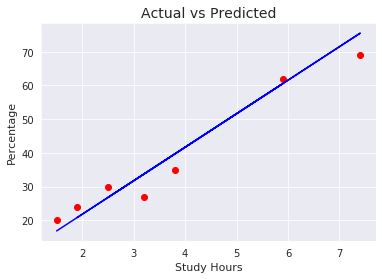

In [31]:
#Compare graphically the Predicted Marks with the Actual Marks
plt.scatter(x=value_x, y=value_y, color='red')
plt.plot(value_x, predict_y, color='Blue')
plt.title('Actual vs Predicted', size=14)
plt.ylabel('Percentage', size=11)
plt.xlabel('Study Hours', size=11)
plt.show()

In [32]:
#Accuracy of model
print('Mean absolute error: ',mean_absolute_error(value_y,predict_y))

Mean absolute error:  4.130879918502482


In [33]:
# Question: What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?
#Solution as follows
hrs = [9.25]
answer = regression.predict([hrs])
print(" Respective Score = {}".format(round(answer[0],3)))

 Respective Score = 93.893


In [ ]:
#End